# Загрузка библиотек

In [3]:
%run -i "D:/Data_Science/Projects/PIK/import_lib.ipynb"
seed = 42
from sklearn.feature_selection import VarianceThreshold

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Чтение данных

In [4]:
train = pd.read_csv("input/train.csv", parse_dates=["date1"], dayfirst=True)
test = pd.read_csv("input/test.csv", parse_dates=["date1"], dayfirst=True)

# ../input/m_train_small.csv


# data = pd.read_csv("data.csv", parse_dates=["date1"], dayfirst=True)

# df_list=[]
# for line in open("status.csv", "r"):
#     line = line.replace('"', '').strip()
#     df_list.append(line)
# status = pd.read_csv(io.StringIO('\n'.join(df_list)))

# status.head()

### train/test/data

In [5]:
print(train.shape)
train.head()

(8716, 56)


,id,bulk_id,spalen,date1,start_square,value,price,mean_sq,mean_fl,plan_s,plan_m,plan_l,vid_0,vid_1,vid_2,month,month_cnt,Класс объекта,Количество помещений,Огорожена территория,Площадь земельного участка,Входные группы,Детский сад,Школа,Поликлиника,ФОК,Спортивная площадка,Автомойка,Кладовые,Колясочные,Кондиционирование,Вентлияция,Лифт,Система мусоротведения,Видеонаблюдение,Подземная парковка,Двор без машин,Машиномест,Площадь пром. зоны в радиусе 500 м,Площадь зеленой зоны в радиусе 500 м,До Кремля,До ТТК(км),До Садового(км),До большой дороги на машине(км),До удобной авторазвязки на машине(км),До метро пешком(км),До промки(км),До парка(км),До парка пешком(км),Станций метро от кольца,Площадь двора,Курс,Cтавка по ипотеке,Вклады до 1 года,Вклады от 1 года до 3 лет,Вклады свыше 3 лет
0,0,FF3814A9-9F7D-E711-8530-00505688958B,1,2017-10-01,13109.9,1124.5,135633.913043,38.00,8,147,198,0,0,169,176,10,34,эконом,1983,нет,17.0,да,345,825,0,0,да,нет,да,да,1,1,1,контейнеры,0,да,да,1800,65357.0,25533.0,18.0,12.0,16.0,0.55,1.7,1.4,0.28,0.58,0.93,8.0,7640.0,57.698052,10.04,5.74,5.94,6.03
1,1,FF3814A9-9F7D-E711-8530-00505688958B,2,2017-10-01,19898.4,1412.3,128492.419825,58.01,9,139,120,83,30,136,177,10,34,эконом,1983,нет,17.0,да,345,825,0,0,да,нет,да,да,1,1,1,контейнеры,0,да,да,1800,65357.0,25533.0,18.0,12.0,16.0,0.55,1.7,1.4,0.28,0.58,0.93,8.0,7640.0,57.698052,10.04,5.74,5.94,6.03
2,2,FF3814A9-9F7D-E711-8530-00505688958B,0,2017-10-01,2100.0,345.0,158237.634409,22.58,10,78,15,0,0,73,20,10,34,эконом,1983,нет,17.0,да,345,825,0,0,да,нет,да,да,1,1,1,контейнеры,0,да,да,1800,65357.0,25533.0,18.0,12.0,16.0,0.55,1.7,1.4,0.28,0.58,0.93,8.0,7640.0,57.698052,10.04,5.74,5.94,6.03
3,3,FF3814A9-9F7D-E711-8530-00505688958B,3,2017-10-01,9614.9,769.4,123250.000000,78.81,8,50,0,72,0,30,92,10,34,эконом,1983,нет,17.0,да,345,825,0,0,да,нет,да,да,1,1,1,контейнеры,0,да,да,1800,65357.0,25533.0,18.0,12.0,16.0,0.55,1.7,1.4,0.28,0.58,0.93,8.0,7640.0,57.698052,10.04,5.74,5.94,6.03
4,4,FF3814A9-9F7D-E711-8530-00505688958B,1,2017-11-01,11947.2,526.7,139420.634921,37.93,9,140,175,0,0,145,170,11,35,эконом,1983,нет,17.0,да,345,825,0,0,да,нет,да,да,1,1,1,контейнеры,0,да,да,1800,65357.0,25533.0,18.0,12.0,16.0,0.55,1.7,1.4,0.28,0.58,0.93,8.0,7640.0,58.926552,9.87,5.17,7.07,6.20


In [6]:
round(train.describe(),2)

,id,spalen,start_square,value,price,mean_sq,mean_fl,plan_s,plan_m,plan_l,vid_0,vid_1,vid_2,month,month_cnt,Количество помещений,Площадь земельного участка,Детский сад,Школа,Поликлиника,ФОК,Кондиционирование,Вентлияция,Лифт,Видеонаблюдение,Машиномест,Площадь пром. зоны в радиусе 500 м,Площадь зеленой зоны в радиусе 500 м,До Кремля,До ТТК(км),До Садового(км),До большой дороги на машине(км),До удобной авторазвязки на машине(км),До метро пешком(км),До промки(км),До парка(км),До парка пешком(км),Станций метро от кольца,Площадь двора,Курс,Cтавка по ипотеке,Вклады до 1 года,Вклады от 1 года до 3 лет,Вклады свыше 3 лет
count,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.0,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00,8716.00
mean,4357.50,1.75,2334.25,267.56,114823.92,56.64,10.55,13.75,12.50,16.56,3.49,11.54,22.81,6.97,27.19,2838.98,46.84,515.43,1346.44,181.36,0.13,1.62,0.63,1.0,0.72,4080.62,54560.81,102140.85,20.31,14.94,17.87,1.82,6.69,4.34,0.50,0.79,1.13,8.85,6189.31,60.61,11.31,6.26,7.08,7.13
std,2516.24,1.17,3159.76,376.17,36301.01,25.04,5.07,30.33,28.67,29.99,11.45,26.14,39.81,3.64,7.97,1405.84,44.44,280.05,985.06,258.19,0.34,0.93,0.84,0.0,0.51,2988.45,80182.40,124208.34,5.35,5.18,5.35,1.70,5.25,5.04,0.40,0.51,0.66,3.61,3303.85,4.55,1.12,0.87,0.79,0.99
min,0.00,0.00,19.30,0.00,30155.09,18.90,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.00,432.00,1.70,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00,80.00,0.00,0.00,5.50,0.55,3.10,0.06,1.10,0.25,0.03,0.05,0.07,2.00,1365.00,56.44,9.73,5.17,5.94,5.79
25%,2178.75,1.00,274.48,36.32,87351.39,37.66,7.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,22.00,1931.00,19.00,220.00,800.00,0.00,0.00,1.00,0.00,1.0,0.00,997.00,0.00,12487.00,18.00,13.00,16.00,0.52,3.50,0.96,0.17,0.38,0.65,7.00,4000.00,57.74,10.04,5.62,6.64,6.05
50%,4357.50,2.00,1161.78,130.78,102809.38,54.56,10.00,1.00,0.00,2.00,0.00,0.00,5.00,7.00,29.00,2454.00,23.25,470.00,1100.00,0.00,0.00,1.00,0.00,1.0,1.00,3500.00,13159.00,31614.00,20.00,14.00,17.00,1.20,5.40,2.50,0.39,0.62,1.00,9.00,5203.00,58.93,11.29,6.17,6.76,7.00
75%,6536.25,3.00,3119.06,357.76,138158.41,76.98,14.00,15.00,12.00,21.00,0.00,10.00,29.00,10.00,34.00,3958.00,70.00,800.00,2000.00,500.00,0.00,3.00,1.00,1.0,1.00,7050.00,83805.00,166632.00,25.00,19.00,22.00,2.70,8.60,5.60,0.70,1.20,1.60,12.00,6822.00,62.62,12.21,6.75,7.39,7.93
max,8715.00,4.00,32494.30,5746.58,263000.00,141.65,32.00,381.00,336.00,316.00,141.00,234.00,376.00,12.00,37.00,5579.00,215.00,1000.00,3250.00,600.00,1.00,3.00,2.00,1.0,2.00,9745.00,378372.00,516706.00,38.00,33.00,36.00,6.00,26.00,21.00,1.50,1.95,2.70,15.00,16473.00,77.93,13.43,8.84,8.94,9.69


In [7]:
print(test.shape)
test.head()

(1770, 48)


,id,bulk_id,spalen,date1,price,mean_sq,mean_fl,month,month_cnt,Класс объекта,Количество помещений,Огорожена территория,Площадь земельного участка,Входные группы,Детский сад,Школа,Поликлиника,ФОК,Спортивная площадка,Автомойка,Кладовые,Колясочные,Кондиционирование,Вентлияция,Лифт,Система мусоротведения,Видеонаблюдение,Подземная парковка,Двор без машин,Машиномест,Площадь пром. зоны в радиусе 500 м,Площадь зеленой зоны в радиусе 500 м,До Кремля,До ТТК(км),До Садового(км),До большой дороги на машине(км),До удобной авторазвязки на машине(км),До метро пешком(км),До промки(км),До парка(км),До парка пешком(км),Станций метро от кольца,Площадь двора,Курс,Cтавка по ипотеке,Вклады до 1 года,Вклады от 1 года до 3 лет,Вклады свыше 3 лет
0,0,FF3814A9-9F7D-E711-8530-00505688958B,1,2018-02-01,144734.016393,37.97,9,2,38,эконом,1983,нет,17.0,да,345,825,0,0,да,нет,да,да,1,1,1,контейнеры,0,да,да,1800,65357.0,25533.0,18.0,12.0,16.0,0.55,1.7,1.4,0.28,0.58,0.93,8.0,7640.0,56.806705,9.78,5.48,6.20,6.16
1,1,FF3814A9-9F7D-E711-8530-00505688958B,2,2018-02-01,136729.844961,57.78,9,2,38,эконом,1983,нет,17.0,да,345,825,0,0,да,нет,да,да,1,1,1,контейнеры,0,да,да,1800,65357.0,25533.0,18.0,12.0,16.0,0.55,1.7,1.4,0.28,0.58,0.93,8.0,7640.0,56.806705,9.78,5.48,6.20,6.16
2,2,FF3814A9-9F7D-E711-8530-00505688958B,0,2018-02-01,167787.719298,23.21,10,2,38,эконом,1983,нет,17.0,да,345,825,0,0,да,нет,да,да,1,1,1,контейнеры,0,да,да,1800,65357.0,25533.0,18.0,12.0,16.0,0.55,1.7,1.4,0.28,0.58,0.93,8.0,7640.0,56.806705,9.78,5.48,6.20,6.16
3,3,FF3814A9-9F7D-E711-8530-00505688958B,3,2018-02-01,132855.319149,79.39,9,2,38,эконом,1983,нет,17.0,да,345,825,0,0,да,нет,да,да,1,1,1,контейнеры,0,да,да,1800,65357.0,25533.0,18.0,12.0,16.0,0.55,1.7,1.4,0.28,0.58,0.93,8.0,7640.0,56.806705,9.78,5.48,6.20,6.16
4,4,FF3814A9-9F7D-E711-8530-00505688958B,1,2018-03-01,147387.111111,37.99,9,3,39,эконом,1983,нет,17.0,да,345,825,0,0,да,нет,да,да,1,1,1,контейнеры,0,да,да,1800,65357.0,25533.0,18.0,12.0,16.0,0.55,1.7,1.4,0.28,0.58,0.93,8.0,7640.0,57.063605,9.70,5.53,6.13,5.63


In [8]:
round(test.describe(),2)

,id,spalen,price,mean_sq,mean_fl,month,month_cnt,Количество помещений,Площадь земельного участка,Детский сад,Школа,Поликлиника,ФОК,Кондиционирование,Вентлияция,Лифт,Видеонаблюдение,Машиномест,Площадь пром. зоны в радиусе 500 м,Площадь зеленой зоны в радиусе 500 м,До Кремля,До ТТК(км),До Садового(км),До большой дороги на машине(км),До удобной авторазвязки на машине(км),До метро пешком(км),До промки(км),До парка(км),До парка пешком(км),Станций метро от кольца,Площадь двора,Курс,Cтавка по ипотеке,Вклады до 1 года,Вклады от 1 года до 3 лет,Вклады свыше 3 лет
count,1770.00,1770.00,1770.00,1770.00,1770.00,1770.00,1770.00,1770.00,1770.00,1770.00,1770.00,1770.00,1770.00,1770.00,1770.00,1770.0,1770.00,1770.00,1770.00,1770.00,1770.00,1770.00,1770.00,1770.00,1770.00,1770.00,1770.00,1770.00,1770.00,1770.00,1770.00,1770.00,1770.00,1770.00,1770.00,1770.00
mean,884.50,1.83,120308.62,58.96,10.63,3.03,39.03,2903.57,42.79,512.25,1281.82,164.24,0.08,1.34,0.64,1.0,0.74,3858.27,68243.47,111356.84,19.66,14.35,17.17,1.63,6.65,4.48,0.45,0.78,1.12,8.16,5884.43,58.28,9.69,5.42,6.19,5.70
std,511.10,1.17,37782.54,25.93,5.50,0.82,0.82,1535.86,43.38,298.98,940.23,248.94,0.27,0.76,0.87,0.0,0.51,3124.15,91408.59,129629.97,6.31,6.11,6.33,1.43,5.69,5.31,0.35,0.47,0.59,3.54,3154.67,1.83,0.08,0.12,0.05,0.33
min,0.00,0.00,60000.00,18.90,1.00,2.00,38.00,432.00,1.70,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00,80.00,0.00,0.00,5.50,0.55,3.10,0.06,1.10,0.30,0.03,0.05,0.07,2.00,1365.00,56.81,9.59,5.25,6.13,5.35
25%,442.25,1.00,90403.57,39.14,7.00,2.00,38.00,1814.00,14.30,220.00,550.00,0.00,0.00,1.00,0.00,1.0,0.00,1250.00,0.00,0.00,16.00,11.00,14.00,0.51,3.50,1.10,0.15,0.39,0.72,6.00,4000.00,56.81,9.59,5.25,6.13,5.35
50%,884.50,2.00,109512.50,57.11,10.00,3.00,39.00,3150.50,23.25,470.00,1150.00,0.00,0.00,1.00,0.00,1.0,1.00,2625.00,26358.00,57055.00,20.00,14.00,17.00,1.30,4.90,2.00,0.32,0.70,1.10,9.00,5098.00,57.06,9.70,5.48,6.20,5.63
75%,1326.75,3.00,144195.65,80.39,14.00,4.00,40.00,4001.00,59.40,775.00,2000.00,500.00,0.00,1.00,2.00,1.0,1.00,6500.00,108983.00,201010.00,25.00,19.00,22.00,2.20,7.20,5.68,0.70,1.20,1.59,10.00,6822.00,60.77,9.78,5.53,6.25,6.16
max,1769.00,4.00,267575.00,141.65,33.00,4.00,40.00,5579.00,215.00,1000.00,3250.00,600.00,1.00,3.00,2.00,1.0,2.00,9745.00,378372.00,516706.00,38.00,33.00,36.00,5.60,26.00,21.00,1.40,1.95,2.60,15.00,16473.00,60.77,9.78,5.53,6.25,6.16


In [9]:
# если нет целевой переменной в тесте
test['value'] = np.nan

In [10]:
# join train & test
df = pd.concat([train,test])
print(df.shape)
df.head()

(10486, 56)


,Cтавка по ипотеке,bulk_id,date1,id,mean_fl,mean_sq,month,month_cnt,plan_l,plan_m,plan_s,price,spalen,start_square,value,vid_0,vid_1,vid_2,Автомойка,Вентлияция,Видеонаблюдение,Вклады до 1 года,Вклады от 1 года до 3 лет,Вклады свыше 3 лет,Входные группы,Двор без машин,Детский сад,До Кремля,До Садового(км),До ТТК(км),До большой дороги на машине(км),До метро пешком(км),До парка пешком(км),До парка(км),До промки(км),До удобной авторазвязки на машине(км),Кладовые,Класс объекта,Количество помещений,Колясочные,Кондиционирование,Курс,Лифт,Машиномест,Огорожена территория,Площадь двора,Площадь зеленой зоны в радиусе 500 м,Площадь земельного участка,Площадь пром. зоны в радиусе 500 м,Подземная парковка,Поликлиника,Система мусоротведения,Спортивная площадка,Станций метро от кольца,ФОК,Школа
0,10.04,FF3814A9-9F7D-E711-8530-00505688958B,2017-10-01,0,8,38.00,10,34,0.0,198.0,147.0,135633.913043,1,13109.9,1124.5,0.0,169.0,176.0,нет,1,0,5.74,5.94,6.03,да,да,345,18.0,16.0,12.0,0.55,1.4,0.93,0.58,0.28,1.7,да,эконом,1983,да,1,57.698052,1,1800,нет,7640.0,25533.0,17.0,65357.0,да,0,контейнеры,да,8.0,0,825
1,10.04,FF3814A9-9F7D-E711-8530-00505688958B,2017-10-01,1,9,58.01,10,34,83.0,120.0,139.0,128492.419825,2,19898.4,1412.3,30.0,136.0,177.0,нет,1,0,5.74,5.94,6.03,да,да,345,18.0,16.0,12.0,0.55,1.4,0.93,0.58,0.28,1.7,да,эконом,1983,да,1,57.698052,1,1800,нет,7640.0,25533.0,17.0,65357.0,да,0,контейнеры,да,8.0,0,825
2,10.04,FF3814A9-9F7D-E711-8530-00505688958B,2017-10-01,2,10,22.58,10,34,0.0,15.0,78.0,158237.634409,0,2100.0,345.0,0.0,73.0,20.0,нет,1,0,5.74,5.94,6.03,да,да,345,18.0,16.0,12.0,0.55,1.4,0.93,0.58,0.28,1.7,да,эконом,1983,да,1,57.698052,1,1800,нет,7640.0,25533.0,17.0,65357.0,да,0,контейнеры,да,8.0,0,825
3,10.04,FF3814A9-9F7D-E711-8530-00505688958B,2017-10-01,3,8,78.81,10,34,72.0,0.0,50.0,123250.000000,3,9614.9,769.4,0.0,30.0,92.0,нет,1,0,5.74,5.94,6.03,да,да,345,18.0,16.0,12.0,0.55,1.4,0.93,0.58,0.28,1.7,да,эконом,1983,да,1,57.698052,1,1800,нет,7640.0,25533.0,17.0,65357.0,да,0,контейнеры,да,8.0,0,825
4,9.87,FF3814A9-9F7D-E711-8530-00505688958B,2017-11-01,4,9,37.93,11,35,0.0,175.0,140.0,139420.634921,1,11947.2,526.7,0.0,145.0,170.0,нет,1,0,5.17,7.07,6.20,да,да,345,18.0,16.0,12.0,0.55,1.4,0.93,0.58,0.28,1.7,да,эконом,1983,да,1,58.926552,1,1800,нет,7640.0,25533.0,17.0,65357.0,да,0,контейнеры,да,8.0,0,825


In [11]:
df.describe()

,Cтавка по ипотеке,id,mean_fl,mean_sq,month,month_cnt,plan_l,plan_m,plan_s,price,spalen,start_square,value,vid_0,vid_1,vid_2,Вентлияция,Видеонаблюдение,Вклады до 1 года,Вклады от 1 года до 3 лет,Вклады свыше 3 лет,Детский сад,До Кремля,До Садового(км),До ТТК(км),До большой дороги на машине(км),До метро пешком(км),До парка пешком(км),До парка(км),До промки(км),До удобной авторазвязки на машине(км),Количество помещений,Кондиционирование,Курс,Лифт,Машиномест,Площадь двора,Площадь зеленой зоны в радиусе 500 м,Площадь земельного участка,Площадь пром. зоны в радиусе 500 м,Поликлиника,Станций метро от кольца,ФОК,Школа
count,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,8716.000000,8716.000000,8716.000000,10486.000000,10486.000000,8716.000000,8716.000000,8716.000000,8716.000000,8716.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.00000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.0,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000
mean,11.033472,3771.269788,10.559508,57.034023,6.301259,29.186630,16.564250,12.496902,13.752639,115749.717165,1.761205,2334.251036,267.558478,3.493460,11.544516,22.812529,0.634274,0.726874,6.116358,6.929161,6.890208,514.892237,20.202651,17.752413,14.84296,1.790431,4.360125,1.130377,0.788299,0.491914,6.679647,2849.884799,1.575434,60.218082,1.0,4043.087355,6137.846176,103696.475110,46.152227,56870.391188,178.471295,8.732024,0.120637,1335.529754
std,1.187194,2645.593580,5.145961,25.208611,3.644337,8.518373,29.991525,28.673434,30.330175,36611.152068,1.173709,3159.761082,376.172308,11.454581,26.138621,39.809947,0.843751,0.513227,0.855260,0.790463,1.054671,283.323197,5.533074,5.532890,5.35405,1.654384,5.088836,0.644483,0.505314,0.393289,5.325397,1428.744089,0.909853,4.306346,0.0,3012.786922,3280.983502,125181.264756,44.285993,82339.997419,256.719965,3.606186,0.325721,977.891510
min,9.590000,0.000000,1.000000,18.900000,1.000000,7.000000,0.000000,0.000000,0.000000,30155.088235,0.000000,19.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.170000,5.940000,5.350000,0.000000,5.500000,3.100000,0.55000,0.060000,0.250000,0.070000,0.050000,0.030000,1.100000,432.000000,0.000000,56.435614,1.0,80.000000,1365.000000,0.000000,1.700000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,9.780000,1310.250000,7.000000,38.000000,3.000000,24.000000,0.000000,0.000000,0.000000,87774.816581,1.000000,274.485000,36.322500,0.000000,0.000000,0.000000,0.000000,0.000000,5.480000,6.280000,6.040000,220.000000,17.000000,15.000000,11.00000,0.520000,0.980000,0.690000,0.380000,0.170000,3.500000,1862.000000,1.000000,57.698052,1.0,997.000000,4000.000000,10404.000000,19.000000,0.000000,0.000000,7.000000,0.000000,800.000000
50%,11.000000,3472.500000,10.000000,54.955000,6.000000,31.000000,2.000000,0.000000,1.000000,104000.000000,2.000000,1161.785000,130.775000,0.000000,0.000000,5.000000,0.000000,1.000000,5.940000,6.700000,6.630000,470.000000,20.000000,17.000000,14.00000,1.200000,2.500000,1.000000,0.640000,0.380000,5.300000,2454.000000,1.000000,58.573855,1.0,3305.000000,5203.000000,35212.000000,23.250000,13391.000000,0.000000,9.000000,0.000000,1150.000000
75%,12.140000,6093.750000,14.000000,77.370000,10.000000,36.000000,21.000000,12.000000,15.000000,139097.222222,3.000000,3119.060000,357.755000,0.000000,10.000000,29.000000,1.000000,1.000000,6.620000,7.160000,7.810000,800.000000,25.000000,22.000000,19.00000,2.500000,5.600000,1.600000,1.200000,0.700000,8.600000,3958.000000,3.000000,60.769891,1.0,7050.000000,6822.000000,166632.000000,60.000000,96664.750000,500.000000,12.000000,0.000000,2000.000000
max,13.430000,8715.000000,33.000000,141.650000,12.000000,40.000000,316.000000,336.000000,381.000000,267575.000000,4.000000,32494.300000,5746.580000,141.000000,234.000000,376.000000,2.000000,2.000000,8.840000,8.94

In [16]:
# df.isnull().sum().sort_values(ascending=False)
# df.count(axis=0).sort_values()

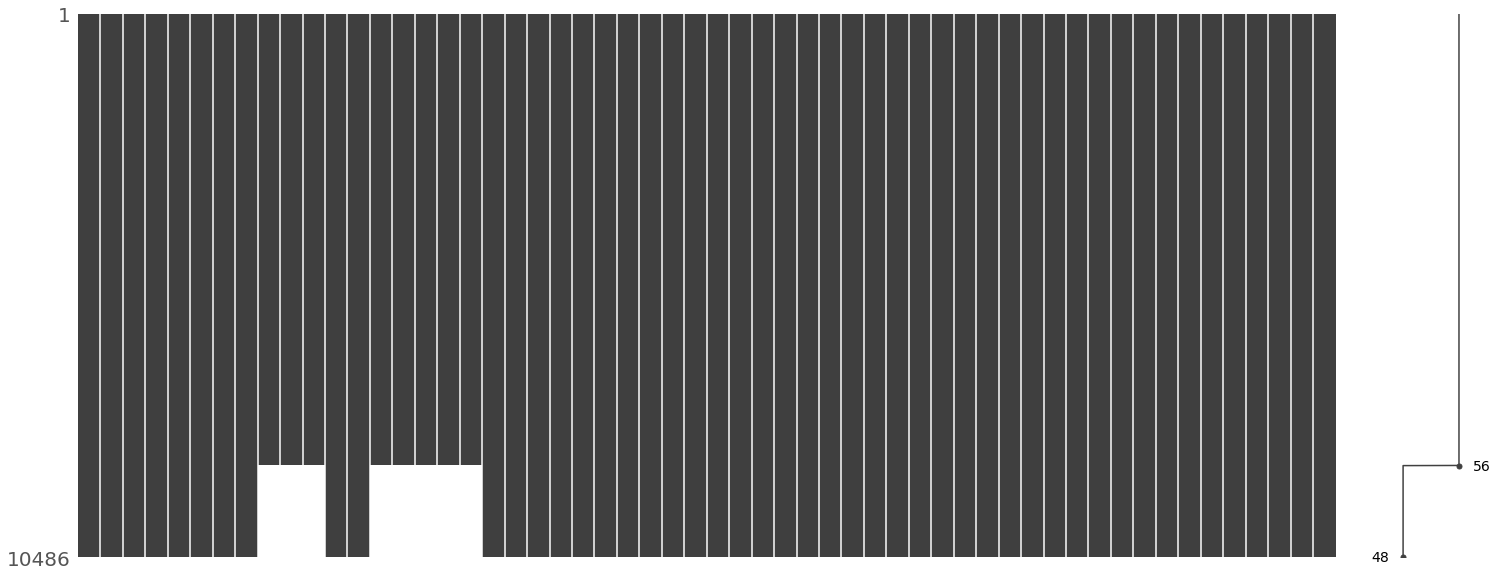

In [472]:
msno.matrix(df)#.iloc[:,10:20])

In [473]:
# Identify missing values above threshold
missing_threshold = 0.75

train = df[df.value.notnull()]
test = df[df.value.isnull()]

train_missing = (train.isnull().sum() / len(train)).sort_values(ascending = False)
test_missing = (test.isnull().sum() / len(test)).sort_values(ascending = False)

In [474]:
train_missing = train_missing.index[train_missing > missing_threshold]
test_missing = test_missing.index[test_missing > missing_threshold]

all_missing = list(set(set(train_missing) | set(test_missing)))
print('There are %d columns with more than 75%% missing values: ' % len(all_missing), all_missing)

There are 8 columns with more than 75% missing values:  ['plan_l', 'vid_2', 'plan_m', 'plan_s', 'start_square', 'value', 'vid_1', 'vid_0']


### drop 

In [475]:
## more x % missing
# df.drop(test_missing, axis=1, inplace=True)

In [476]:
# признаки с 1 уникальным значением

drop_df = pd.DataFrame(df.nunique().sort_values(ascending=False), columns=["count"])
drop_df = drop_df.where(lambda x : x ==1).dropna()
drop_val = list(drop_df.index)
df.drop(drop_val, axis=1, inplace=True)
print("Также удалим признаки с одним уникальным значением: ", drop_val)

Также удалим признаки с одним уникальным значением:  ['Лифт', 'Система мусоротведения', 'Спортивная площадка']


In [477]:
df.drop(["id", "plan_s", "plan_m", "plan_l", "vid_0", "vid_1", "vid_2", "start_square"], axis=1, inplace=True)

### изменить порядок колонок

In [478]:
first_order_col = ['date1', 'bulk_id', 'spalen', 'mean_sq', 'price', 'log_value']
cols = ([col for col in first_order_col if col in df] 
        + [col for col in df if col not in first_order_col])
df = df[cols]

### sort values

In [479]:
df.sort_values(['date1', 'bulk_id', 'spalen'], ascending=[True, True, True], inplace=True)

### id

In [480]:
## save id
# id_test = df[8716:].id.values
# pd.DataFrame(id_test, columns=["id_test"]).to_csv("id_test.csv")

### rename

In [481]:
df.columns

Index(['date1', 'bulk_id', 'spalen', 'mean_sq', 'price', 'Cтавка по ипотеке',
       'mean_fl', 'month', 'month_cnt', 'value', 'Автомойка', 'Вентлияция',
       'Видеонаблюдение', 'Вклады до 1 года', 'Вклады от 1 года до 3 лет',
       'Вклады свыше 3 лет', 'Входные группы', 'Двор без машин', 'Детский сад',
       'До Кремля', 'До Садового(км)', 'До ТТК(км)',
       'До большой дороги на машине(км)', 'До метро пешком(км)',
       'До парка пешком(км)', 'До парка(км)', 'До промки(км)',
       'До удобной авторазвязки на машине(км)', 'Кладовые', 'Класс объекта',
       'Количество помещений', 'Колясочные', 'Кондиционирование', 'Курс',
       'Машиномест', 'Огорожена территория', 'Площадь двора',
       'Площадь зеленой зоны в радиусе 500 м', 'Площадь земельного участка',
       'Площадь пром. зоны в радиусе 500 м', 'Подземная парковка',
       'Поликлиника', 'Станций метро от кольца', 'ФОК', 'Школа'],
      dtype='object')

In [482]:
df.columns = ['date', 'bulk_id','spalen',  'mean_sq', 'price',  'ipoteka', 
        'mean_fl', 'month','month_cnt',  'value', 'avtomoika', 'vent',
       'video', 'dep_1', 'dep_1_3',
       'dep_3', 'input_groups', 'dvor_no_car', 'det_sad',
       'to_cremlin', 'to_sadoviy', 'to_ttk',
       'to_big_road', 'to_metro',
       'to_park_foot', 'to_park', 'to_prom',
       'to_conv_avtorazvyazka', 'kladovie', 'object_class',
       'num_pomesh', 'kolyas', 'cond', 'course',
       'mashinomest', 'ogorozh_ter', 'dvor_sq',
       'green_sq_500', 'zem_sq',
       'prom_sq_500', 'parking_under',
       'poliklinnika',
       'station_num_koltso', 'fok', 'school'
]

In [ ]:
# df = df.rename(columns={'satisfaction_level': 'satisfaction', 
#                         'last_evaluation': 'evaluation',
#                         'number_project': 'projectCount',
#                         'average_montly_hours': 'averageMonthlyHours',
#                         'time_spend_company': 'yearsAtCompany',
#                         'Work_accident': 'workAccident',
#                         'promotion_last_5years': 'promotion',
#                         'sales' : 'department'
#                         })

### label encoding

In [483]:
obj_col = list(df.select_dtypes(include=['object']).columns)
df[obj_col].head()

,bulk_id,avtomoika,input_groups,dvor_no_car,kladovie,object_class,kolyas,ogorozh_ter,parking_under
6516,17D28148-DFDF-E611-B624-001EC9D56418,нет,да,да,нет,эконом,да,нет,да
4021,253ECC9B-BFAD-E611-9FBE-001EC9D5643C,нет,да,нет,да,эконом,да,нет,да
4023,293ECC9B-BFAD-E611-9FBE-001EC9D5643C,нет,да,нет,да,эконом,да,нет,да
4022,293ECC9B-BFAD-E611-9FBE-001EC9D5643C,нет,да,нет,да,эконом,да,нет,да
6513,3B6018F1-C2AD-E611-9FBE-001EC9D5643C,нет,да,да,нет,эконом,да,нет,да


In [484]:
df[obj_col] = df[obj_col].apply(LabelEncoder().fit_transform)
df[obj_col].head()

,bulk_id,avtomoika,input_groups,dvor_no_car,kladovie,object_class,kolyas,ogorozh_ter,parking_under
6516,23,1,0,0,1,2,0,1,0
4021,33,1,0,1,0,2,0,1,0
4023,36,1,0,1,0,2,0,1,0
4022,36,1,0,1,0,2,0,1,0
6513,60,1,0,0,1,2,0,1,0


### one-hot encoding

In [485]:
cat_df = pd.DataFrame(df.nunique().sort_values(ascending=False), columns=["count"])
cat_df = cat_df.where(lambda x : (x > 2) & (x <= 7)).dropna()
cat_feat = list(cat_df.index)
cat_feat

['spalen', 'poliklinnika', 'object_class', 'video', 'vent', 'cond']

In [486]:
for i in cat_feat:
    print(i)
    print(df[i].value_counts())
    print (" ")

spalen
1    2869
2    2722
3    2469
0    1739
4     687
Name: spalen, dtype: int64
 
poliklinnika
0      7043
600    1424
500    1264
510     755
Name: poliklinnika, dtype: int64
 
object_class
0    6200
2    3097
1    1189
Name: object_class, dtype: int64
 
video
1    6942
0    3204
2     340
Name: video, dtype: int64
 
vent
0    6351
2    2516
1    1619
Name: vent, dtype: int64
 
cond
1    7427
3    3031
0      28
Name: cond, dtype: int64
 


In [487]:
cat_list =  [x for x in cat_feat if x != "spalen"]
for i in cat_list:
    t = pd.get_dummies(df[i], prefix=i)  
    df = pd.concat([df, t], axis=1)
    df.drop(i, axis=1, inplace=True)
    
# сохраняем переменную "spalen"
t = pd.get_dummies(df["spalen"])
t.columns = [ "spalen" + '_' + str(col) for col in t.columns]
df = pd.concat([df, t], axis=1)

In [488]:
df.head()

,date,bulk_id,spalen,mean_sq,price,ipoteka,mean_fl,month,month_cnt,value,avtomoika,dep_1,dep_1_3,dep_3,input_groups,dvor_no_car,det_sad,to_cremlin,to_sadoviy,to_ttk,to_big_road,to_metro,to_park_foot,to_park,to_prom,to_conv_avtorazvyazka,kladovie,num_pomesh,kolyas,course,mashinomest,ogorozh_ter,dvor_sq,green_sq_500,zem_sq,prom_sq_500,parking_under,station_num_koltso,fok,school,poliklinnika_0,poliklinnika_500,poliklinnika_510,poliklinnika_600,object_class_0,object_class_1,object_class_2,video_0,video_1,video_2,vent_0,vent_1,vent_2,cond_0,cond_1,cond_3,spalen_0,spalen_1,spalen_2,spalen_3,spalen_4
6516,2015-07-01,23,2,60.10,93238.000000,13.3,12,7,7,60.10,1,8.84,8.74,9.69,0,0,1000,25.0,23.0,19.0,1.5,5.1,0.34,0.25,0.46,7.3,1,3301,0,57.17967,2625,1,7343.0,262718.0,22.0,13442.0,0,12.0,0,2500,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0
4021,2015-07-01,33,1,35.30,115042.000000,13.3,8,7,7,282.37,1,8.84,8.74,9.69,0,1,900,19.0,16.0,14.0,1.6,1.5,1.30,1.10,0.13,10.0,0,3685,0,57.17967,1400,1,5903.0,0.0,41.0,136344.0,0,8.0,0,3250,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0
4023,2015-07-01,36,0,26.29,90922.210008,13.3,5,7,7,78.87,1,8.84,8.74,9.69,0,1,900,19.0,16.0,14.0,1.3,1.2,1.50,1.30,0.13,9.5,0,3685,0,57.17967,1400,1,6083.0,0.0,41.0,265718.0,0,8.0,0,3250,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0
4022,2015-07-01,36,1,36.02,85753.568871,13.3,5,7,7,396.22,1,8.84,8.74,9.69,0,1,900,19.0,16.0,14.0,1.3,1.2,1.50,1.30,0.13,9.5,0,3685,0,57.17967,1400,1,6083.0,0.0,41.0,265718.0,0,8.0,0,3250,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0
6513,2015-07-01,60,1,37.92,66077.983700,13.3,6,7,7,455.00,1,8.84,8.74,9.69,0,0,1000,25.0,23.0,19.0,1.9,4.7,0.50,0.30,0.30,6.4,1,3301,0,57.17967,2625,1,7968.0,111466.0,22.0,13391.0,0,12.0,0,2500,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0


### date

In [489]:
df["year"] = pd.DatetimeIndex(df["date"]).year
df["quarter"] = pd.DatetimeIndex(df["date"]).quarter
df['date'] = df['year'] + (df['month']-1)/12

df.drop("date", axis=1, inplace=True)

In [490]:
# With tree-based models, you can safely ignore correlation issues. 
# With non tree-based models, you must take care of correlation issues

### Pearson correlation

In [491]:
# One of the assumptions for Pearson's correlation coefficient is that the parent population should be 
# normally distributed which is a continuous distribution. Ordinal data being discrete violate this assumption
# making it unfit for use for ordinal variables.

df.corr().abs().sort_values('value', inplace=False, ascending=False)["value"].head(10)

value               1.000000
spalen_2            0.290596
spalen_0            0.205953
price               0.130657
parking_under       0.123163
year                0.117756
green_sq_500        0.109406
spalen_4            0.107373
poliklinnika_500    0.100571
month_cnt           0.100424
Name: value, dtype: float64

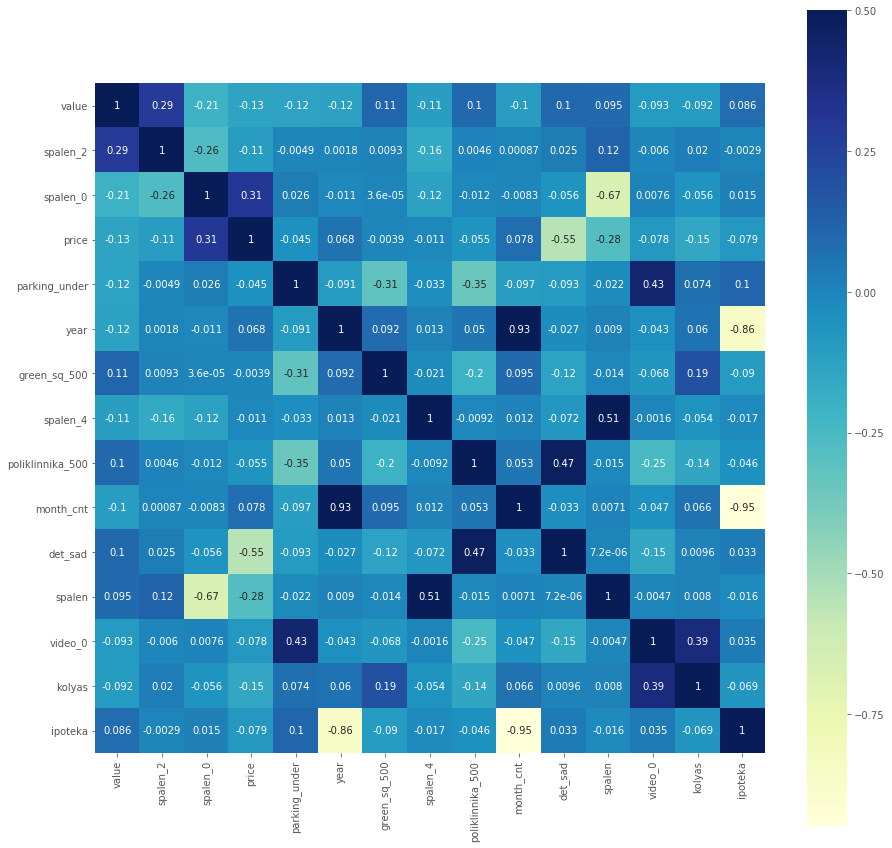

In [492]:
corrmat = df.corr().abs()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'value')['value'].index
plt.figure(figsize=(15,15))
sns.heatmap(df[cols].corr(method="pearson"), vmax=0.5, square=True, annot=True, cmap="YlGnBu")

### Spearman correlation

In [493]:
df.corr(method="spearman").abs().sort_values('value', inplace=False, ascending=False)["value"].head(10)

value               1.000000
spalen_2            0.273803
spalen_0            0.255703
spalen_4            0.137579
price               0.123339
mean_sq             0.112713
spalen              0.109059
parking_under       0.106234
year                0.095950
poliklinnika_510    0.087223
Name: value, dtype: float64

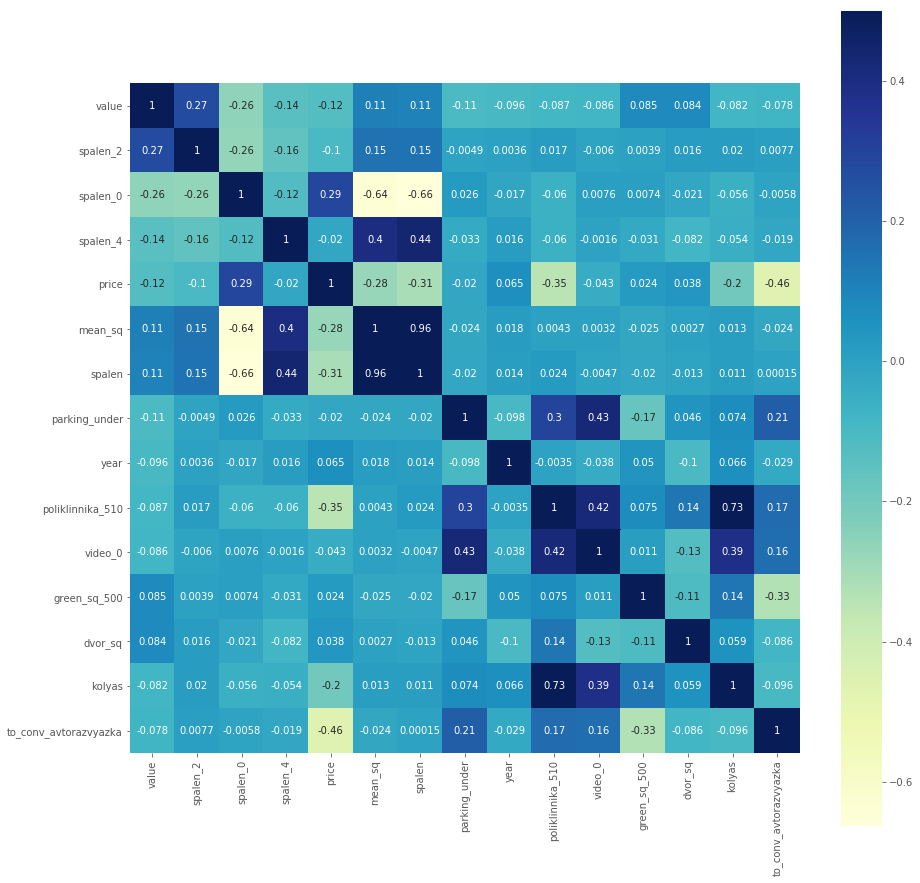

In [494]:
corrmat = df.corr(method="spearman").abs()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'value')['value'].index
plt.figure(figsize=(15,15))
sns.heatmap(df[cols].corr(method="spearman"), vmax=0.5, square=True, annot=True, cmap="YlGnBu")

### Kendall correlation

In [495]:
df.corr(method="kendall").abs().sort_values('value', inplace=False, ascending=False)["value"].head(10)

value               1.000000
spalen_2            0.227357
spalen_0            0.212328
spalen_4            0.114241
parking_under       0.088214
spalen              0.087550
mean_sq             0.087298
price               0.084797
year                0.075973
poliklinnika_510    0.072428
Name: value, dtype: float64

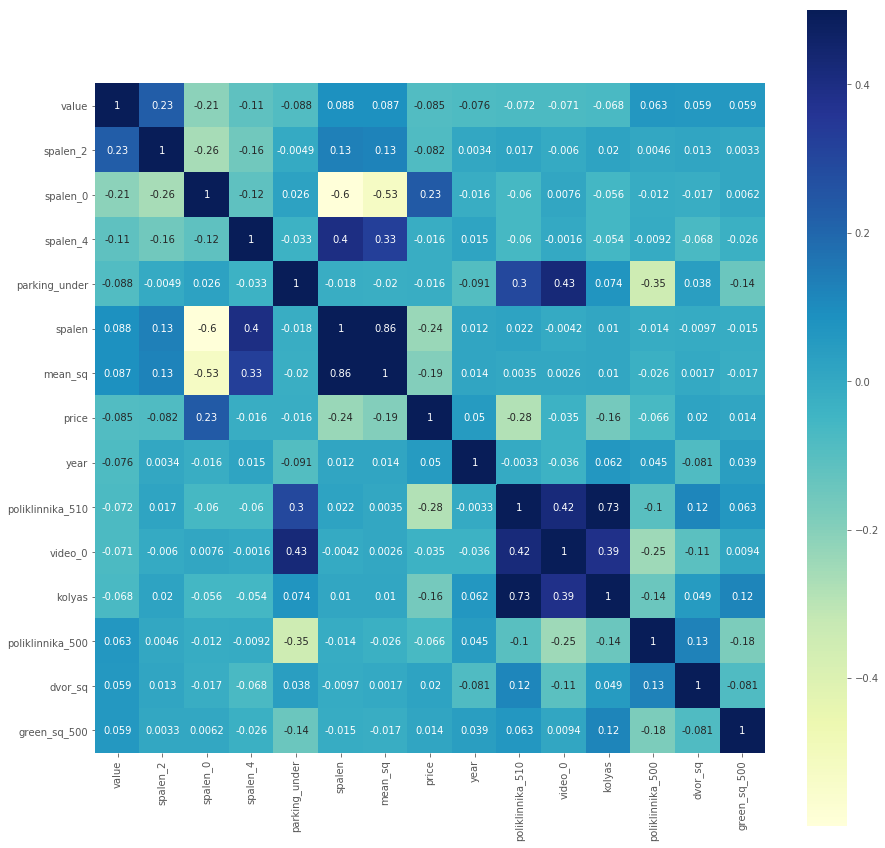

In [496]:
corrmat = df.corr(method="kendall").abs()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'value')['value'].index
plt.figure(figsize=(15,15))
g = sns.heatmap(df[cols].corr(method="kendall"), vmax=0.5, square=True, annot=True, cmap="YlGnBu")

In [497]:
# plt.figure(figsize=(15,15))
# # верхний треугольник
# sns.heatmap(corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool)), \
#                                                       vmax=0.5, square=True, annot=True, cmap="YlGnBu")
# plt.title("Корреляционная матрица")

### pairs of most correlated features

In [498]:
corrmat = df.corr(method="pearson").abs()

c = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool)) # берем одни из треугольников кор матрицы
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

# Threshold for removing correlated variables
threshold = 0.9

pd.DataFrame(so[(so.values!=1) & (so.values > threshold)], columns=["corr"])
# cond_0 perfect collinearity with input_groups

corr
to_sadoviy to_cremlin  0.996028
to_ttk     to_cremlin  0.994622
           to_sadoviy  0.994452
cond_3     cond_1      0.993542
quarter    month       0.973714
mean_sq    spalen      0.952914
month_cnt  ipoteka     0.948218
video_1    video_0     0.928360
year       month_cnt   0.926991
dep_1_3    month_cnt   0.914652
dep_1      month_cnt   0.911386

In [499]:
### columns to drop

upper = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove: ' % (len(to_drop)), to_drop)

# df.drop(to_drop, axis=1, inplace=True)

There are 11 columns to remove:  ['mean_sq', 'month_cnt', 'dep_1', 'dep_1_3', 'to_sadoviy', 'to_ttk', 'video_1', 'cond_0', 'cond_3', 'year', 'quarter']


### low-variance features

In [530]:
# return df where feature variance more than threshold

threshold = 0.02
selector = VarianceThreshold(threshold=threshold)
scaler = MinMaxScaler()

def format_selector(scaler, selector, data, target):
    
    X = data.drop(target, axis=1)
    
    x_train = scaler.fit_transform(X)
    x_train = pd.DataFrame(x_train, columns=X.columns)

    # Fit the model
    selector.fit(x_train)

    # Retain the feature names
    features = selector.get_support(indices = True)  # Returns array of indexes of nonremoved features
    features = [column for column in data.iloc[:,features] if column != target]  # Gets feature names

    # Transform, Format, Return
    selector = pd.DataFrame(selector.transform(X))
    selector.columns = features
    return selector

format_selector(scaler, selector, df, "value").shape

(10486, 57)

In [1]:
init_feat = list(df.drop("value", axis=1).columns) 
var_sel_feat = list(format_selector(scaler, selector, df, "value").columns)
[item for item in init_feat if item not in var_sel_feat]

NameError: name 'df' is not defined

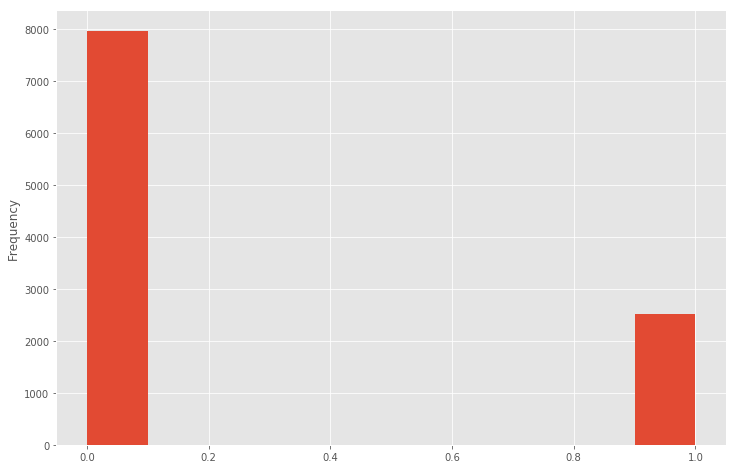

In [536]:
df.vent_2.plot(kind="hist")

In [215]:
df.to_csv("data_prep.csv")